In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 
%matplotlib inline

In [2]:
df = pd.read_csv("house_price.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


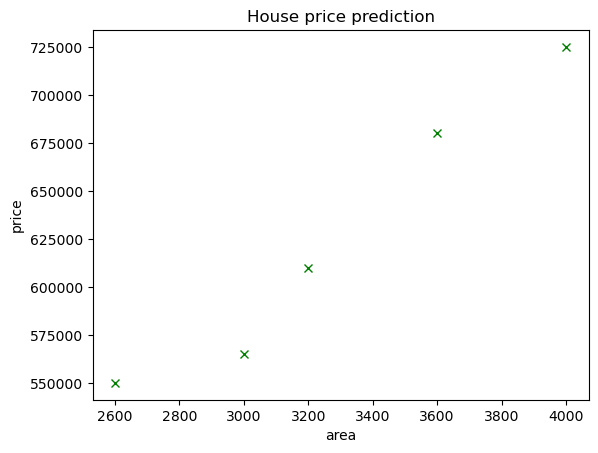

In [3]:
plt.xlabel("area")
plt.ylabel("price")
plt.title("House price prediction")
plt.plot(df['area'].values, df['price'].values, 'gx')

In [11]:
reg = linear_model.LinearRegression()
reg.fit(df.area, df.price) #df.area is a sries. you need a 2d array or a df.

ValueError: Expected 2D array, got 1D array instead:
array=[2600 3000 3200 3600 4000].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [4]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [6]:
reg.predict([[3300]])

C:\Users\sri\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [ ]:
# y = m . x + c 

In [7]:
reg.coef_ # m value

array([135.78767123])

In [8]:
reg.intercept_ # c

180616.43835616432

In [9]:
135.78767123 * 3300 + 180616.43835616432

628715.7534151643

In [10]:
d = pd.DataFrame({
    'sample': [1000,1500,2300,3540,4120,4560,5490,3460,4750,2300,9000,8600,7100,]
})

In [11]:
d

,sample
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [12]:
a = np.array(d.values)

In [16]:
a.shape

(13, 1)

In [13]:
a

array([[1000],
       [1500],
       [2300],
       [3540],
       [4120],
       [4560],
       [5490],
       [3460],
       [4750],
       [2300],
       [9000],
       [8600],
       [7100]], dtype=int64)

In [18]:
pred = reg.predict(a)
pred

C:\Users\sri\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [14]:
pred = reg.predict(d[['sample']].values)

C:\Users\sri\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [43]:
pred

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [44]:
d['price'] = pred

In [45]:
d

,sample,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [46]:
d.to_csv("house_data_predictions.csv", index = False)

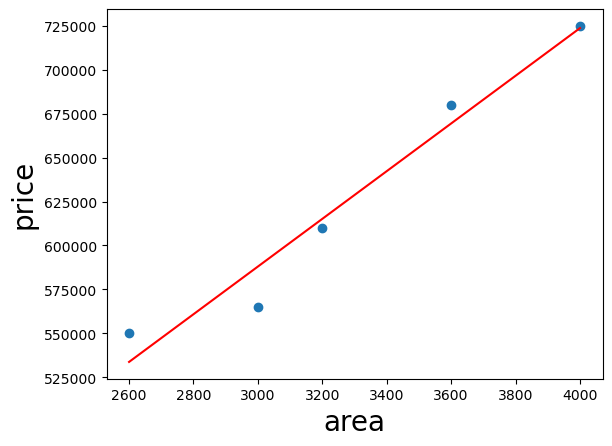

In [61]:
plt.xlabel('area', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.scatter(df.area, df.price)
plt.plot(df.area, reg.predict(df[['area']]), color='red')

In [75]:
# Exercise. Canada's per capita income.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model

In [73]:
df = pd.read_csv("canda_per_capita_income.csv")
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


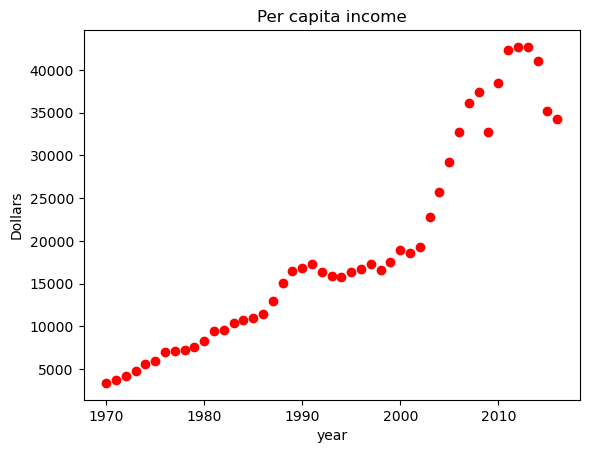

In [80]:
plt.xlabel("year")
plt.ylabel("Dollars")
plt.title("Per capita income")
plt.scatter(df[['year']], df[['per capita income (US$)']], color = 'red')

In [76]:
reg = linear_model.LinearRegression()

In [81]:
reg.fit(df[['year']], df[['per capita income (US$)']])

LinearRegression()

In [83]:
reg.predict([[2020]])

C:\Users\sri\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[41288.69409442]])

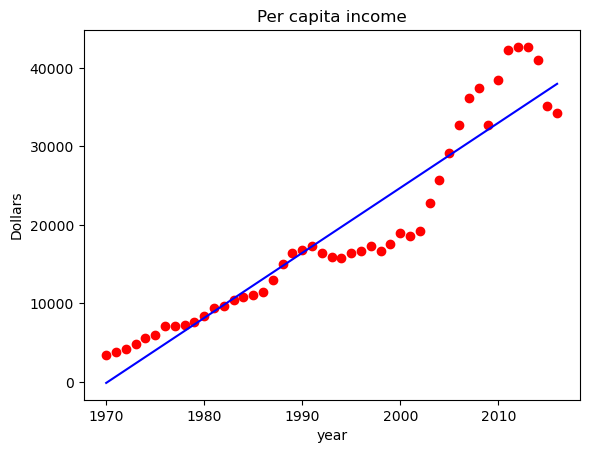

In [85]:
plt.xlabel("year")
plt.ylabel("Dollars")
plt.title("Per capita income")
plt.scatter(df[['year']], df[['per capita income (US$)']], color = 'red')
plt.plot(df[['year']], reg.predict(df[['year']]), color = 'blue')